# Exercise 2.5: Introduction to CMAC
The CMAC controller consists of a series of "receptive fields" (RFs) which can be activated by the input. The idea of the CMAC is to act like a kind of adaptive memory which can be used for feedforward control. Each receptive field is only activated in a small area of the input space.

We will begin with the case of a single input and output dimension. Your first task is to use the CMAC to learn a function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For a single input dimension, the activation of the receptive fields is computed with Gaussian basis functions like so:
\begin{equation}
    \phi_i(x) = \exp\left(-\frac{(x-\mu_i)^2}{\sigma^2} \right), \; i = 1, 2, \dots, N.
\end{equation}
The activation of a receptive field, $\phi_i(x)$, is a number between 0 and 1. A value close to 0 means that the particular receptive field does not match the given input, and a value close to 1 means that the particular receptive field contains information (a memory) about the given input $x$.
***

To get started, we define a number of receptive fields $N=5$, and distribute the mean values $\mu_i$ evenly in the interval $[0,2\pi]$. We also select a value for the width $\sigma$.

Below you see a plot of all of the receptive fields in one figure with x on the x-axis and $\phi_i$ on the y-axis. How much do they overlap? Try to change $\sigma$ and see what happens. How does the overlap depend on your choice of $\sigma$?

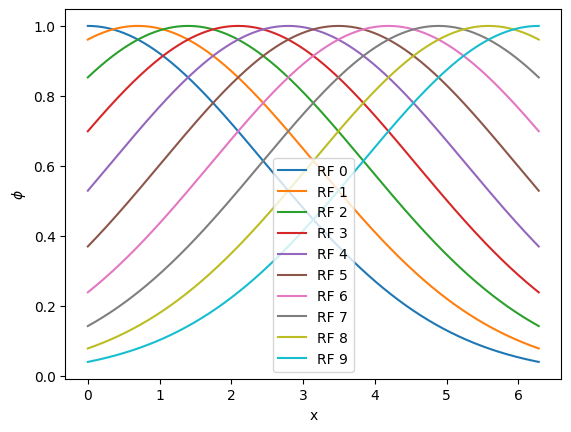

In [169]:
xmin = 0
xmax = 2*np.pi

# N = 25
# sigma = 0.25
N = 10
sigma = 3.5

mu = np.linspace(xmin, xmax, N)

n_plot = 10000
xplot = np.linspace(0, 2*np.pi, n_plot)

plt.figure()
for i in range(N):
    phi = np.exp(-(xplot-mu[i])**2/sigma**2)
    plt.plot(xplot, phi, label='RF ' + str(i))
plt.xlabel('x')
plt.ylabel('$\phi$')
plt.legend()
plt.show()

We will now initialize a vector $\mathbf{w}$ of size $N$. These are the weights that will be learned, carrying the memory. The output is now given as
    \begin{equation}
        \hat{y} = \sum_{i=1}^N w_i \phi_i = \mathbf{w}^T \phi,
    \end{equation}
where the last $\phi$ is a vector containing all the receptive field activations $\phi_i$.

We initialize the weights randomly:

In [6]:
w = np.random.normal(loc=0.0, scale=0.1,size=N)

We can plot the output $\hat{y}$ for the given input range of x:l

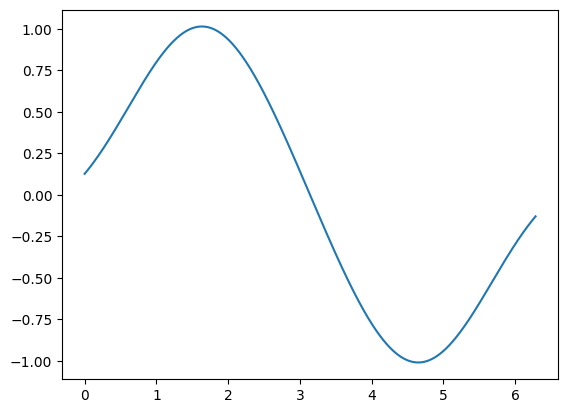

In [75]:
y = np.zeros(n_plot)
for i in range(N):
    y += w[i]*np.exp(-(xplot-mu[i])**2/sigma**2)

plt.figure()
plt.plot(xplot, y)
plt.show()

At this point the output is completely random.

We will attempt to learn the function $\sin(x)$. To update the receptive fields, we will use the covariance learning rule, which updates the weights using a single training example $(x, y_d)$ where $y_d$ is the desired output. Given the error $e = y_d - \hat{y}$, the update rule is:
    
\begin{equation}
    w_i^{(k+1)} = w_i^{(k)} +\beta e \phi_i,
\end{equation}
where $w_i^{(k)}$ is the $i$'th weight in the $k$'th iteration and $\beta$ is the learning rate.

We generate a number of examples, $(x, y_d)$, where $y_d = \sin(x)$. The range of $x$ values is in the same range as used for the receptive fields. For each example we:
 - calculate the CMAC output, $\hat{y}$.
 - calculate the associated error, $e$, and save it in a vector.
 - update the weights using the covariance learning rule (using $\beta=10^{-3}$).
***
Lastly, we calculate the mean square error (MSE) of all the examples. We run through all of the examples a number of times, and plot the estimated function together with $\sin(x)$.

Epoch 0
Final MSE: 0.40457535464963407


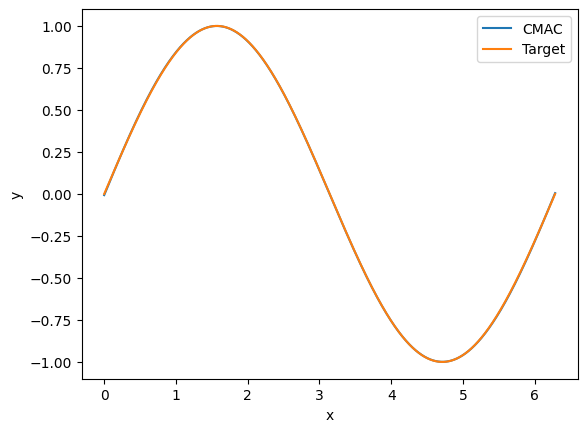

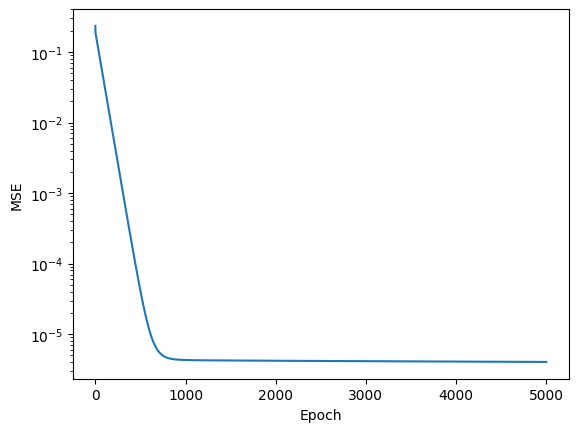

In [170]:
w = np.random.normal(loc=0.0, scale=0.1,size=N)
beta = 1e-1

n_epochs = 5_000
n_examples = 100

x = np.linspace(0, 2*np.pi, n_examples)
y = np.sin(x)
p = np.random.permutation(len(x))
x, y = x[p], y[p]

e_vec = []

for epoch in range(n_epochs): # in each epoch
    if epoch % 5_000 == 0:
        print(f'Epoch {epoch}')
    es = []
    for k in range(x.shape[0]): # for every example
        phi = np.exp(-(x[k]-mu)**2/sigma**2) # for all receptive fields at once

        yhat = np.dot(w, phi)
        e = y[k] - yhat 
        es.append(e**2)

        w += beta*e*phi # for all weights

    e_vec.append(np.mean(np.array(es)))

y = np.zeros(n_plot)
for i in range(N):
    y += w[i]*np.exp(-(xplot-mu[i])**2/sigma**2)

plt.figure()
plt.plot(xplot, y, label='CMAC')
plt.plot(xplot, np.sin(xplot), label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.figure()
plt.plot(e_vec)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE')

print(f'Final MSE: {e_vec[-1]/1e-5}')

Run the above code a number of times with different parameters. Answer the following questions:
 - What is a good value for $\sigma$?
 - After how many "epochs" does the learning converge?
 - Does it make a difference in what order the examples are given, or how many there are?

Increase the number of receptive fields. How many is needed for the MSE to reach below $10^{-5}$ ?